<a href="https://colab.research.google.com/github/KhannaRishika/DataAnalytics_Projects/blob/main/C5S3_Hackathon_Brazilian_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install dython --user
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sb
import numpy as np
from dython import nominal

'''
Objective: Aim of this study is to help a data analyst working at Casto Brazilia,
           figure out suitable cities for relocation of employees for permanent work from home.


In this analysis we will try to find the most suitable city based on following criteria:

#A] Bachelors:
     Assumed requirements- No. of rooms<2 & No. of bathrooms<2 & No. of parking spaces<2

#B] Mid sized families:
     Assumed requirements- No. of rooms>=2 & <=4 & No. of bathrooms>=2 & <=4 & No. of parking spaces>=2 & <=4
     
#C] Large Families:
     Assumed requirements- No. of rooms>=5 & No. of bathrooms>=5 & No. of parking spaces>=5

**PS- It is given to us that most workers who want to relocate are from 'São Paulo' & 'Rio de Janeiro'.
    Since the cost of living is high in these cities.***
    
'''




In [ ]:
# reading the file into a dataframe

df=pd.read_csv('DS1_C5_S3_BazilHousing_Data_Hackathon.csv')

# LEVEL 0 ANALYSIS

In [ ]:
# filtering the rows

df_filter = df[~df['city'].isin(['São Paulo','Rio de Janeiro'])]

df_filter['total (R$)'] = df_filter['total (R$)'] + df_filter['hoa (R$)']      # adding home association tax & total(R$)

df_filter.head(3)


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,4841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1691
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1731


In [ ]:
# DF details

print('Column names: \n',df_filter.columns)
print('\n\nColumn data-types: \n',df_filter.dtypes)
print('\n\nColumn count of missing values: \n',df_filter.isna().sum())  # no null handling required


# Interpretation:
# There are 3 object type columns, and rest are integer.
# There are no null values in any columns

Column names: 
 Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')


Column data-types: 
 city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                   int64
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object


Column count of missing values: 
 city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0


In [ ]:
# Step 1: Defining a function to identify the datatypes of columns as categorical or numerical. Seperate them in two lists.

def datatype(df_filter):
    #all numerical cols
    num = list(df_filter.select_dtypes(exclude='object').columns)

    #all categorical cols
    cat = list(df_filter.select_dtypes(include='object').columns)

    return(num,cat)
num,cat= datatype(df_filter)

print('Numerical columns: \n',num)
print('\n\nCategorical columns: \n',cat)

# Interpretation
# There are 3 categorical columns and 10 numerical columns.

Numerical columns: 
 ['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']


Categorical columns: 
 ['city', 'animal', 'furniture']


In [ ]:
# Step 2: Perform descriptive analysis of categorical columns identified above.

def categorical(col): # categorical function def

    print('\nColumn: ', col)

    # unique val
    print('Unique Values: ',df_filter[col].unique())

    # mode
    print('Mode: ',df_filter[col].mode()[0])

    # count missing values
    print('Count of missing values: ',df_filter[col].isnull().sum())

for x in cat: categorical(x)



Column:  city
Unique Values:  ['Porto Alegre' 'Campinas' 'Belo Horizonte']
Mode:  Belo Horizonte
Count of missing values:  0

Column:  animal
Unique Values:  ['acept' 'not acept']
Mode:  acept
Count of missing values:  0

Column:  furniture
Unique Values:  ['not furnished' 'furnished']
Mode:  not furnished
Count of missing values:  0


In [ ]:
# Step 3: Perform descriptive analysis on numerical cols, by creating a function.
# central tendency, std. deviation, missing values, skewness.

def numerical(col):

    print('\nColumn: ', col)

    #mean
    print('mean: ',df_filter[col].mean().round(2))

    #median
    #print('median: ',round(df_filter[col].median(),2))

    #mode
    print('mode: ',df_filter[col].mode()[0])

    #sd
    #print(f'std deviation: {round(df_filter[col].std(),2)}')

    #skew
    #print(f'skewness: {df_filter[col].skew().round(2)}')

    # count missing values
    #print('Count of missing values: ',df_filter[col].isnull().sum())

    #print(set(df_filter[col]))

for x in num: numerical(x)



Column:  area
mean:  151.9
mode:  70

Column:  rooms
mean:  2.53
mode:  2

Column:  bathroom
mean:  2.04
mode:  1

Column:  parking spaces
mean:  1.52
mode:  1

Column:  floor
mean:  3.99
mode:  0

Column:  hoa (R$)
mean:  1224.82
mode:  0

Column:  rent amount (R$)
mean:  2849.6
mode:  1200

Column:  property tax (R$)
mean:  186.76
mode:  0

Column:  fire insurance (R$)
mean:  41.95
mode:  14

Column:  total (R$)
mean:  5528.15
mode:  3033


In [ ]:
# Generic function to display percentage above bars in graphs.

def per_abv_bar(col1,col2,col,ax):

    c = pd.crosstab(col1,col2)  # for getting counts of yes/no attrition values, based on the col specified.
    x=pd.merge(col,c, left_index=True, right_index=True)
    #x=x.drop([col1],axis=1)
    count=1
    l=[]
    #print(x)
    for i in x.values:
        l.append((i[0]/(i[0]+i[1])*100).round())
        l.append((i[1]/(i[0]+i[1])*100).round())

    percentage=np.reshape(l,newshape=(len(list(c.index)),len(list(c.columns))))
    #print(percentage)
    for bars in ax.containers:

        for i, p in enumerate(bars):
            #print(p)
            formt=f'{percentage[i][count]:.1f}%'
            ax.annotate(formt, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center')   # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle

        count-=1


# A. Bachelors:

CRITERIA:
1. No. of rooms<2
2. No. of bathrooms<2
3. No. of parking spaces<2

In [ ]:
# Filter the data

df_b = df_filter[(df_filter['rooms']<2) & (df_filter['bathroom']<2) & (df_filter['parking spaces']<2)]
df_b= df_b[df_b['total (R$)']!=64750] # removing outlier for better calculation

In [ ]:
# LEVEL 1 (Univariate Analysis)

'\nInterpretation:\n51.3%: Porto Alegre has max number of houses.\n\n'

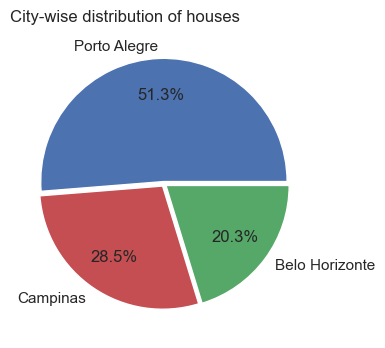

In [ ]:
# A1] Which city is the largest in terms of number of houses?

sb.set(font_scale=1)
data = df_b["city"].value_counts()                                   #value count is counting the number of values in the column
pie, ax = plt.subplots(1, figsize = [5,4])
labels =data.keys()                                                       # Keys returning you the index names in the data
plt.title('City-wise distribution of houses', loc='left')

ax.pie(x = data, explode = [0.02, 0.02, 0.02], labels = labels,autopct = "%.1f%%",pctdistance = 0.7,colors=['b','r','g'])  # pctdistance is the distance between the percentage on pie chart from center.


'''
Interpretation:
51.3%: Porto Alegre has max number of houses.

'''

"\nInterpretation:\n-> 'Porto Alegre' has max number of affordable houses i.e.< 3000$\n"

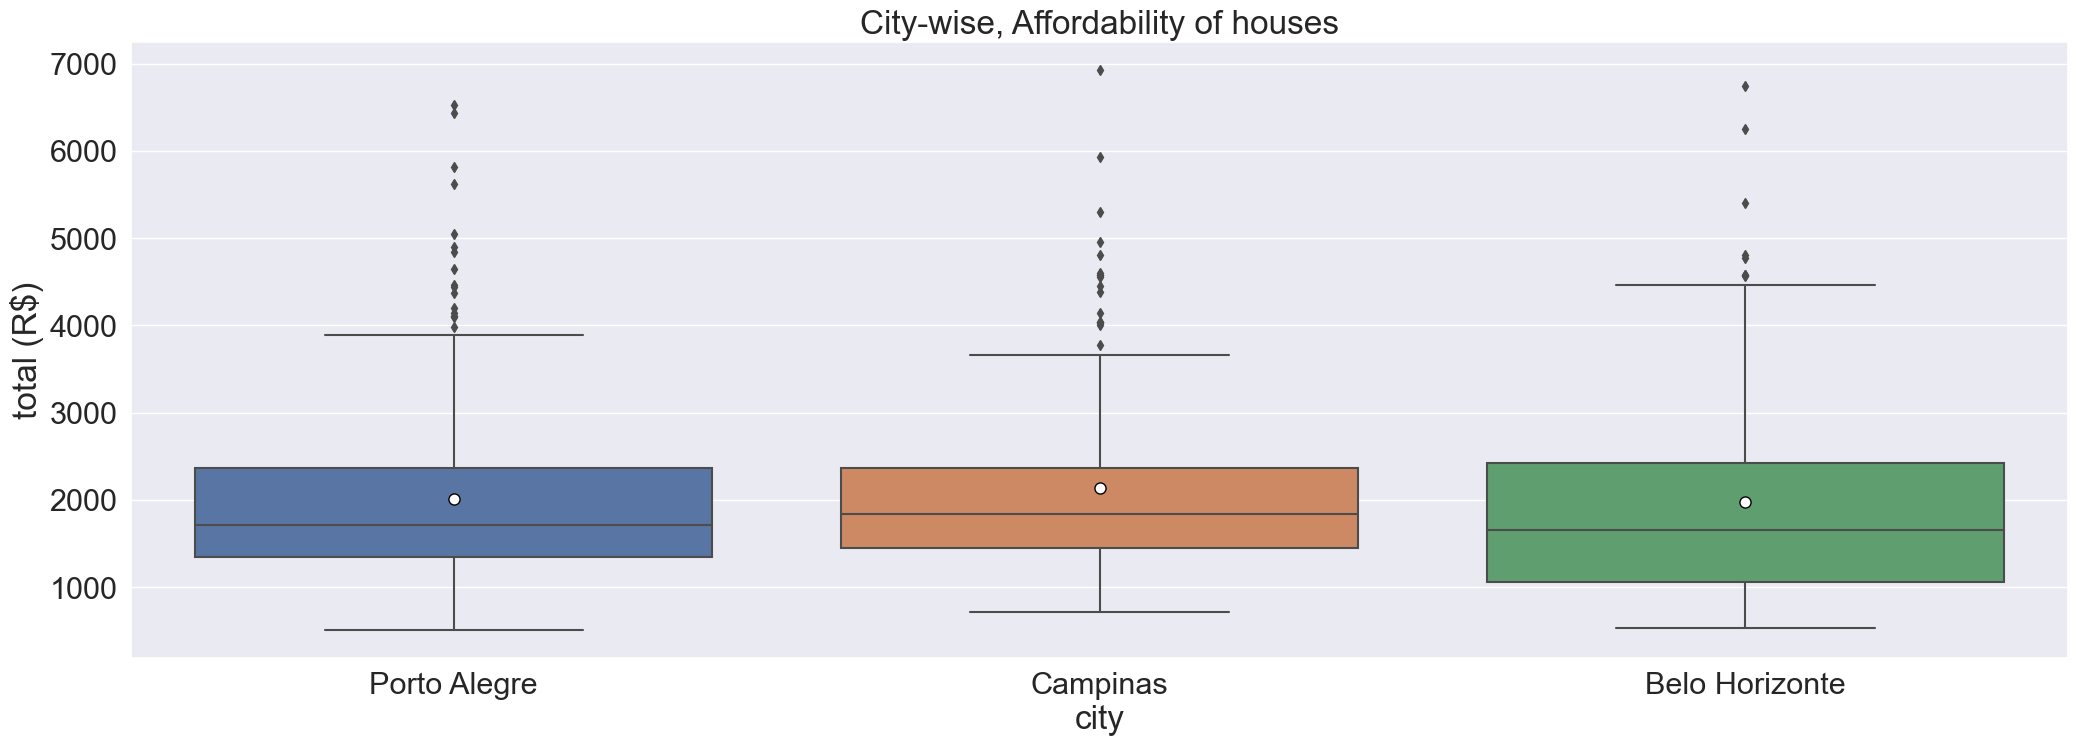

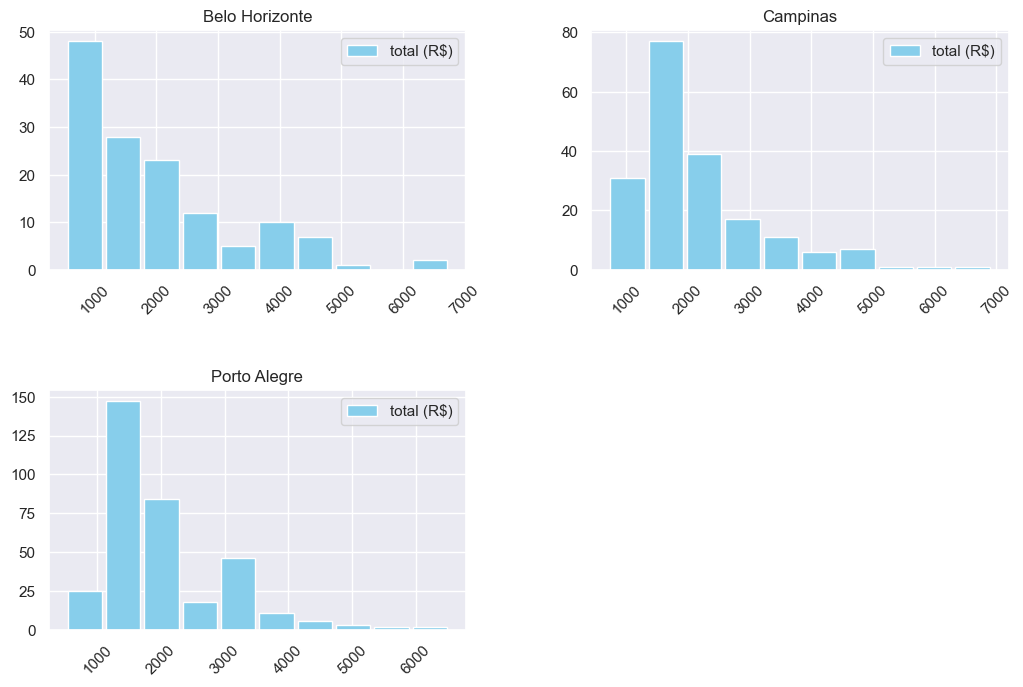

In [ ]:
# A2] Which city has most number of affordable houses i.e.< 3000$.

# Box plot
sb.set(font_scale=2)
plt.figure(figsize=(25,8))
plt.title('City-wise, Affordability of houses')
sb.boxplot(x=df_b['city'],y=df_b['total (R$)'],showmeans=True , meanprops={'marker':'o','markerfacecolor':'white',
                       'markeredgecolor':'black','markersize':'8'},order=['Porto Alegre','Campinas','Belo Horizonte'])

# Histogram
sb.set(font_scale=1)
df_b.hist(column='total (R$)', by='city',figsize=(12,8),rwidth=0.9,color='skyblue',legend=True,xrot=45)

'''
Interpretation:
-> 'Porto Alegre' has max number of affordable houses i.e.< 3000$
'''

In [ ]:
# LEVEL 2 (Bivariate Analysis)

"\nInterpretation:\n-> 'Porto Alegre' - has most affordable low-rise (0-4 floors) houses.\n-> 'Campinas' - has most affordable high-rise (0-11 floors) houses.\n\n"

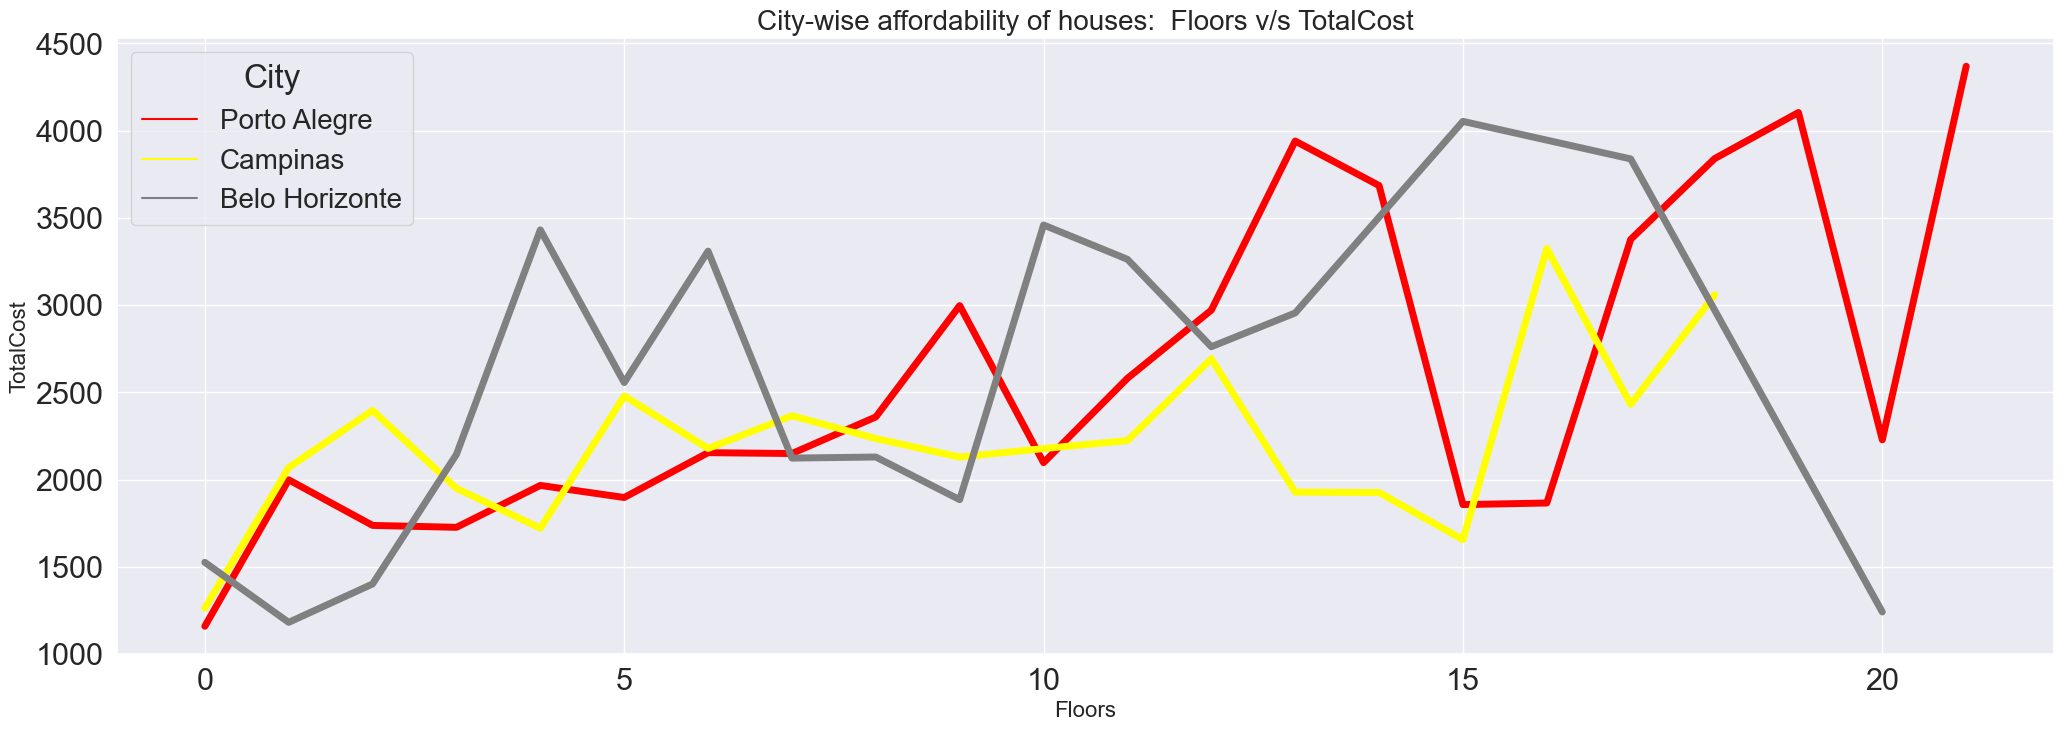

In [ ]:
# A3] With repect to Low-rise(0-5 floors)/High-rise buildings(5 floors & above),
#     which city has most affordable housing options?


df_a2= df_b[df_b['floor']<=50] # removing outlier for better calculation

plt.figure(figsize=(25,8))
sb.set(font_scale=2)
sb.lineplot(data=df_a2, x="floor", y="total (R$)",hue='city',palette=['red', 'yellow','grey'],ci=None,lw=5)
plt.legend(title='City', fontsize=20)
plt.title('City-wise affordability of houses:  Floors v/s TotalCost',fontsize=20)
plt.xlabel('Floors', fontsize=16);
plt.ylabel('TotalCost', fontsize=16);

'''
Interpretation:
-> 'Porto Alegre' - has most affordable low-rise (0-4 floors) houses.
-> 'Campinas' - has most affordable high-rise (0-11 floors) houses.

'''

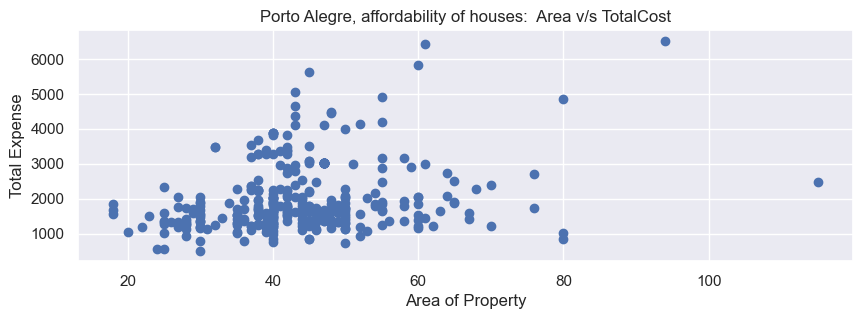

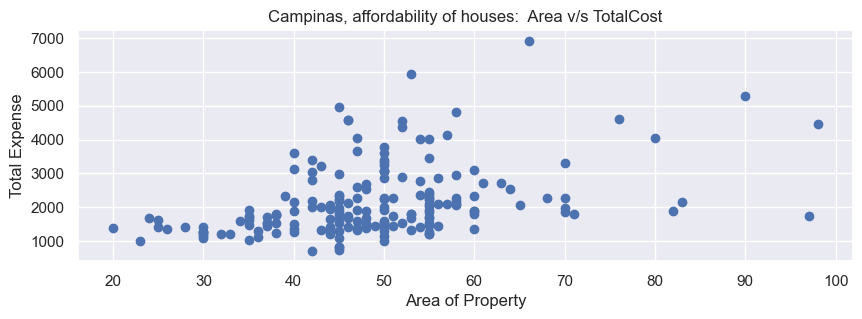

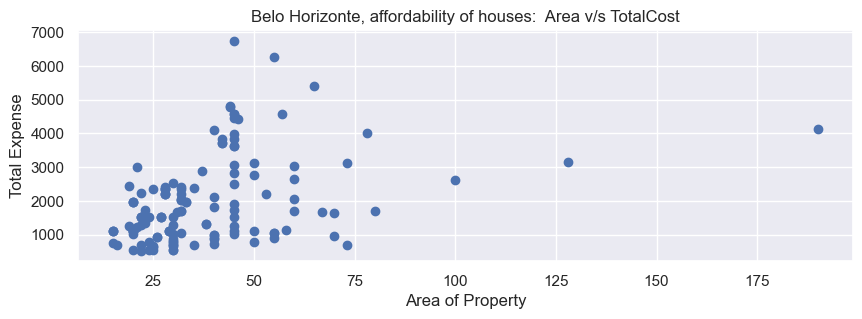

"\nInterpretation:\n-> 'Porto Alegre' has max number of affordable houses area-wise\n\n"

In [ ]:
# A4] Which city has maximum affordable options for houses with repect to Area of property, available in < 3000 $

for city in df_b['city'].unique():
    sb.set(font_scale=1)
    df_b1 = df_b[df_b['city']==city] # filtering the rows

    fig, ax = plt.subplots(1, figsize=(10, 3))
    ax.scatter(df_b1['area'],df_b1['total (R$)'])
    ax.set_xlabel('Area of Property')
    ax.set_ylabel('Total Expense')
    ax.set_title(city+', affordability of houses:  Area v/s TotalCost')

plt.show()


'''
Interpretation:
-> 'Porto Alegre' has max number of affordable houses area-wise

'''

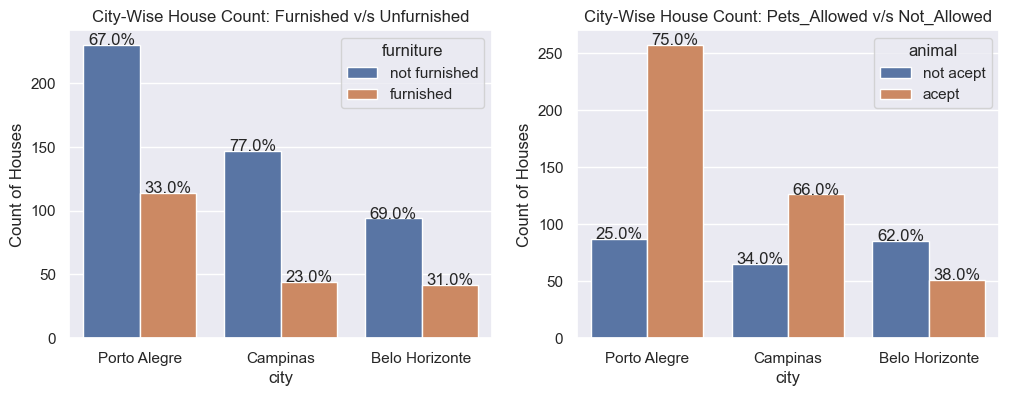

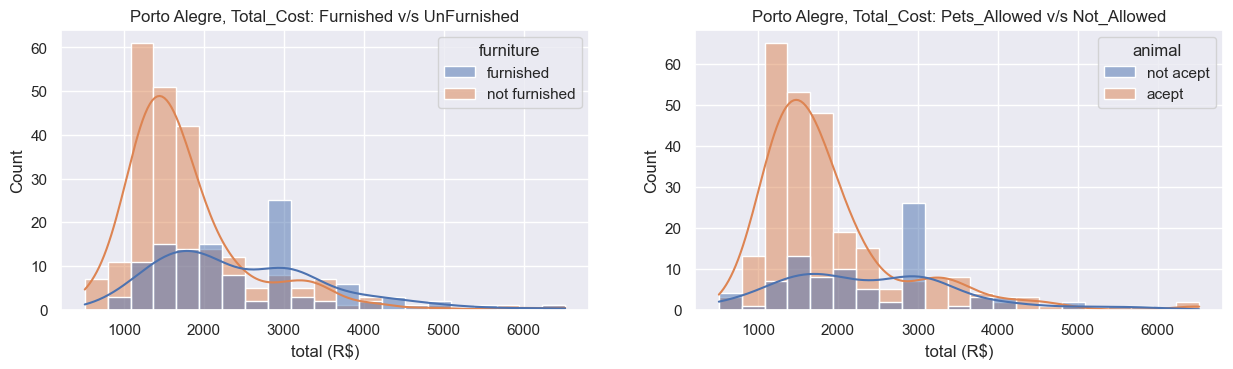

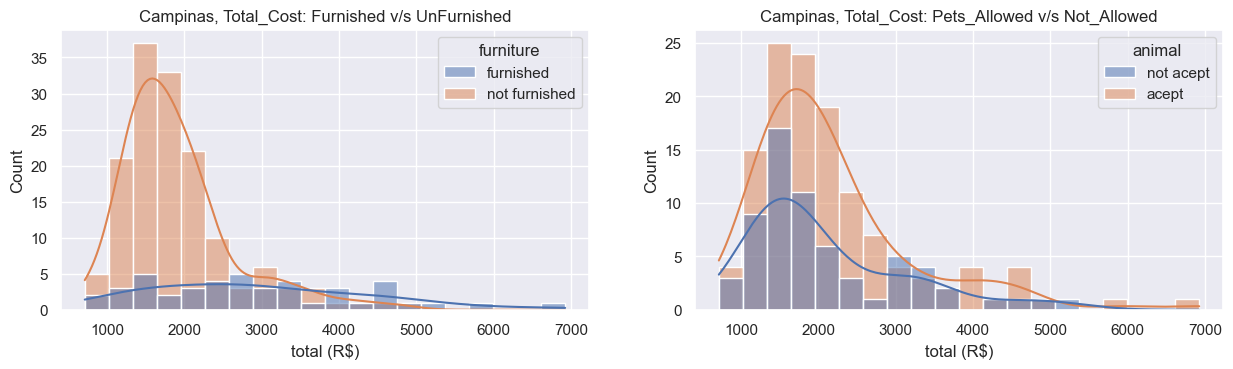

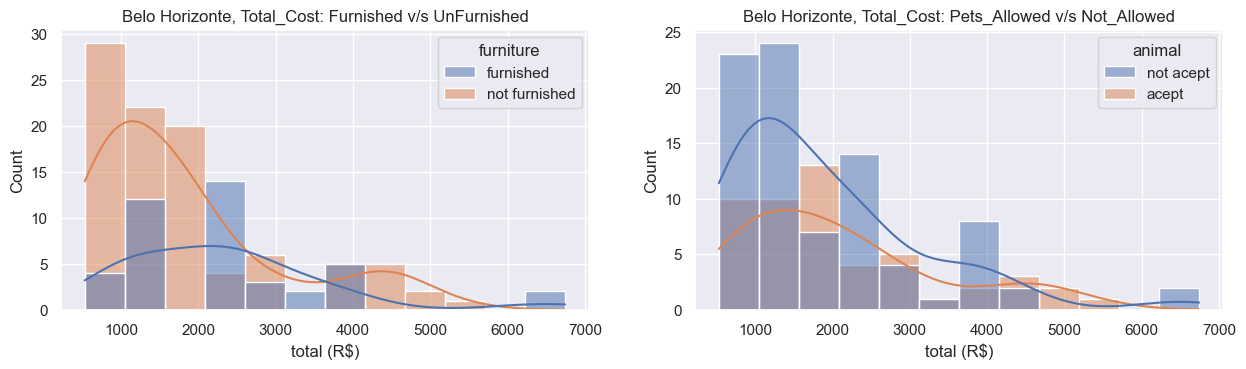

"\nInterpretation:\n-> 'Porto Alegre' has max Furnished houses, which are affordable.\n-> 'Porto Alegre' has max UnFurnished houses, which are affordable. \n\n-> 'Porto Alegre' has max houses with pets allowed, which are affordable.\n-> 'Porto Alegre' has max houses with pets not allowed, which are affordable.\n"

In [ ]:
# A5] Which city has maximum number of affordable houses   (Based on Furnished/Non-Furnished)
#   & Which city has maximum number of affordable houses   (Based on Pets allowed/not allowed)

fig, axes = plt.subplots(1,2, figsize=(12, 4))
col = pd.DataFrame(index=['Porto Alegre', 'Campinas','Belo Horizonte'])

# Countplot Based on Furnished/Non-Furnished
sb.set(font_scale=1)
sb.countplot(x=df_b['city'],hue=df_b['furniture'],order = df_b['city'].value_counts().index, ax=axes[0])
axes[0].set(xlabel='city', ylabel='Count of Houses',title='City-Wise House Count: Furnished v/s Unfurnished')
per_abv_bar(df_b['city'],df_b['furniture'],col,axes[0])     # call generic fn to display % on bars

# Countplot Based on Pets allowed/not allowed
sb.set(font_scale=1)
sb.countplot(x=df_b['city'],hue=df_b['animal'],order = df_b['city'].value_counts().index, ax=axes[1],hue_order=['not acept','acept'])
axes[1].set(xlabel='city', ylabel='Count of Houses',title='City-Wise House Count: Pets_Allowed v/s Not_Allowed')
per_abv_bar(df_b['city'],df_b['animal'],col,axes[1])     # call generic fn to display % on bars


for city in df_b['city'].unique():
    df_b1 = df_b[df_b['city']==city]
    fig = plt.figure(figsize=(15, 8))
    sb.set(font_scale=1)

    # histplot Based on Total_Cost-(Furnished/Non-Furnished)
    plt.subplot(2,2,1)
    plt.title(city+', Total_Cost: Furnished v/s UnFurnished')
    sb.histplot(x=df_b1['total (R$)'],hue=df_b1['furniture'],kde=True,hue_order=['furnished','not furnished'])

    # histplot Based on Total_Cost-(Pets allowed/not allowed)
    plt.subplot(2,2,2)
    plt.title(city+', Total_Cost: Pets_Allowed v/s Not_Allowed')
    sb.histplot(x=df_b1['total (R$)'],hue=df_b1['animal'],kde=True,hue_order=['not acept','acept'])
plt.show()

'''
Interpretation:
-> 'Porto Alegre' has max Furnished houses, which are affordable.
-> 'Porto Alegre' has max UnFurnished houses, which are affordable.

-> 'Porto Alegre' has max houses with pets allowed, which are affordable.
-> 'Porto Alegre' has max houses with pets not allowed, which are affordable.
'''

In [ ]:
# LEVEL 3 (Multivariate Analysis)

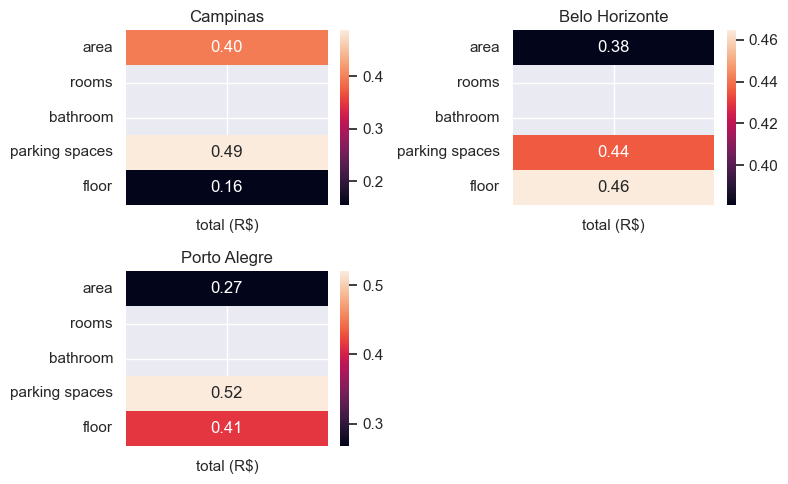

"\nInterpretation:\n-> 'Belo Horizonte' - show moderate +ive correlation with Total Expense.\n-> 'Campinas' - show moderate +ive correlation with Total Expense.\n-> 'Porto Alegre' - show moderate +ive correlation with Total Expense.\n"

In [ ]:
# A6] Correlation b/w Total Expense and other columns

plt.figure(figsize=(8,5))
df_1 = df_b[df_b['city']=='Campinas']
city1=df_1.corr().iloc[0:5,-1:]
plt.subplot(2,2,1)
plt.title('Campinas')
sb.heatmap(city1,annot=True,fmt='0.2f')

df_2 = df_b[df_b['city']=='Belo Horizonte']
city2=df_2.corr().iloc[0:5,-1:]
plt.subplot(2,2,2)
plt.title('Belo Horizonte')
sb.heatmap(city2,annot=True,fmt='0.2f')

df_3 = df_b[df_b['city']=='Porto Alegre']
city3=df_3.corr().iloc[0:5,-1:]
plt.subplot(2,2,3)
plt.title('Porto Alegre')
sb.heatmap(city3,annot=True,fmt='0.2f')

plt.tight_layout()
plt.show()

'''
Interpretation:
-> 'Belo Horizonte' - show moderate +ive correlation with Total Expense.
-> 'Campinas' - show moderate +ive correlation with Total Expense.
-> 'Porto Alegre' - show moderate +ive correlation with Total Expense.
'''

# B. Mid sized families:

CRITERIA:
1. No. of rooms>=2 & <=4
2. No. of bathrooms>=2 & <=4
3. No. of parking spaces>=2 & <=4

In [ ]:
# Filter the data

df_m = df_filter[(df_filter['rooms']>=2) & (df_filter['rooms']<=4) & (df_filter['bathroom']>=2) & (df_filter['bathroom']<=4) & (df_filter['parking spaces']>=2) & (df_filter['parking spaces']<=4)]

In [ ]:
# LEVEL 1 (Univariate Analysis)

'\nInterpretation:\n50.5%: Belo Horizonte has max number of houses.\n\n'

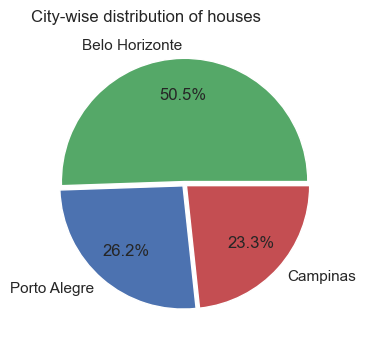

In [ ]:
# B1] Which city is the largest in terms of number of houses?

sb.set(font_scale=1)
data = df_m["city"].value_counts()                                   #value count is counting the number of values in the column
pie, ax = plt.subplots(1, figsize = [5,4])
labels =data.keys()                                                       # Keys returning you the index names in the data
plt.title('City-wise distribution of houses', loc='left')
ax.pie(x = data, explode = [0.02, 0.02, 0.02], labels = labels,autopct = "%.1f%%",pctdistance = 0.7,colors=['g','b','r'])  # pctdistance is the distance between the percentage on pie chart from center.


'''
Interpretation:
50.5%: Belo Horizonte has max number of houses.

'''

"\nInterpretation:\n'Porto Alegre' has max number of affordable houses i.e.< 3000$.\n"

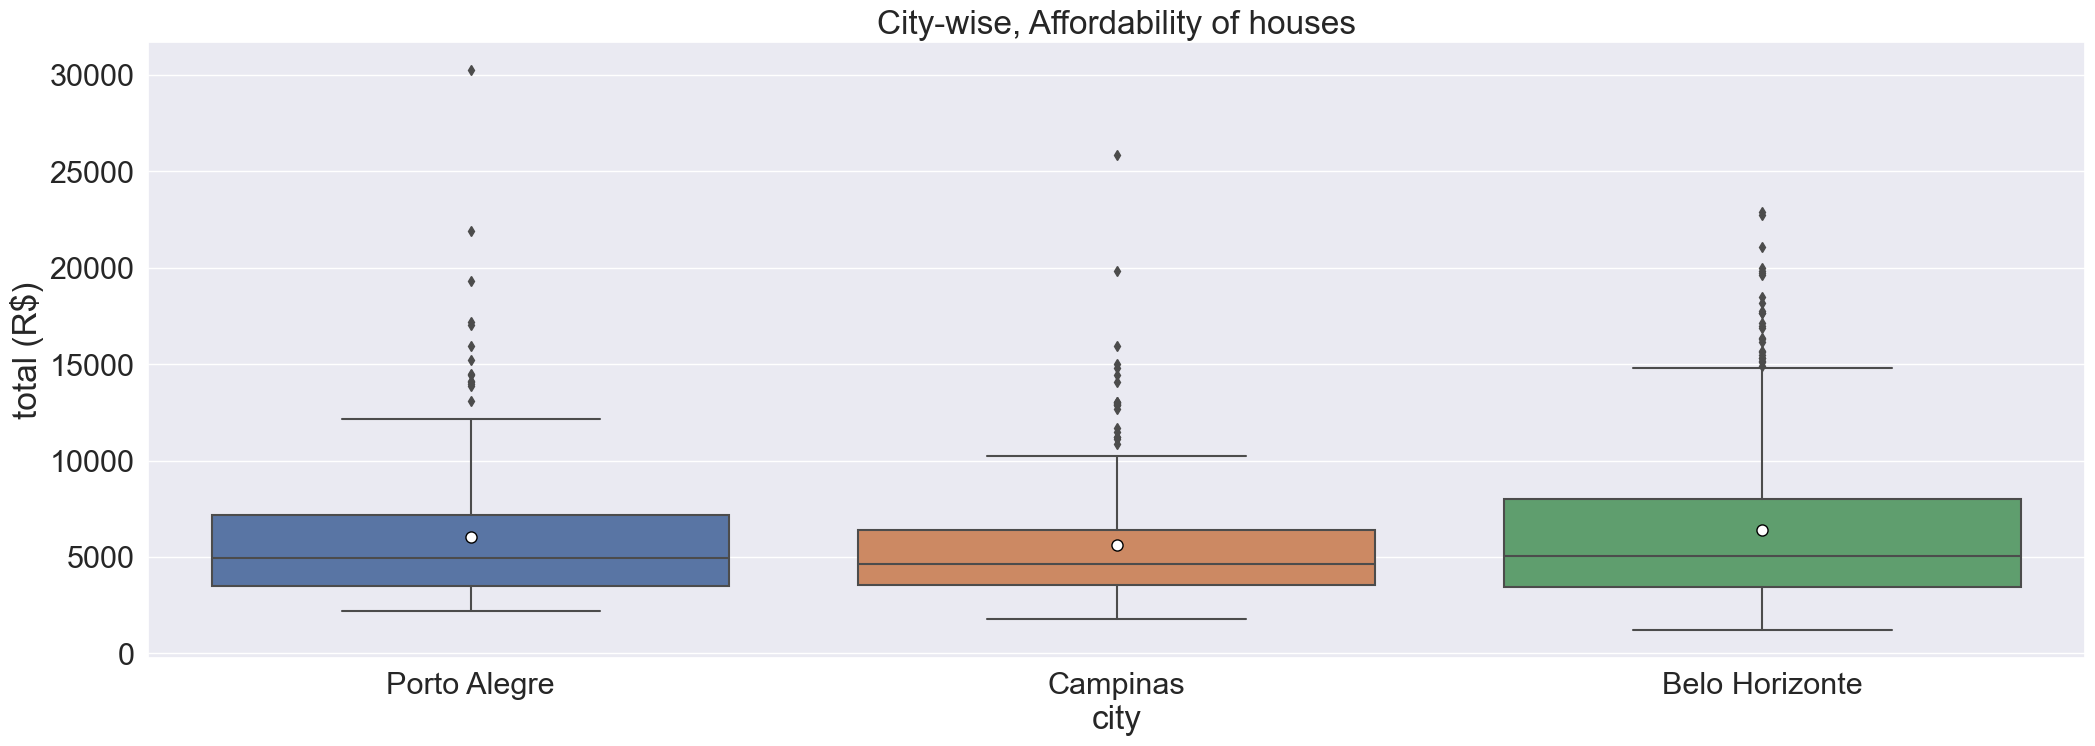

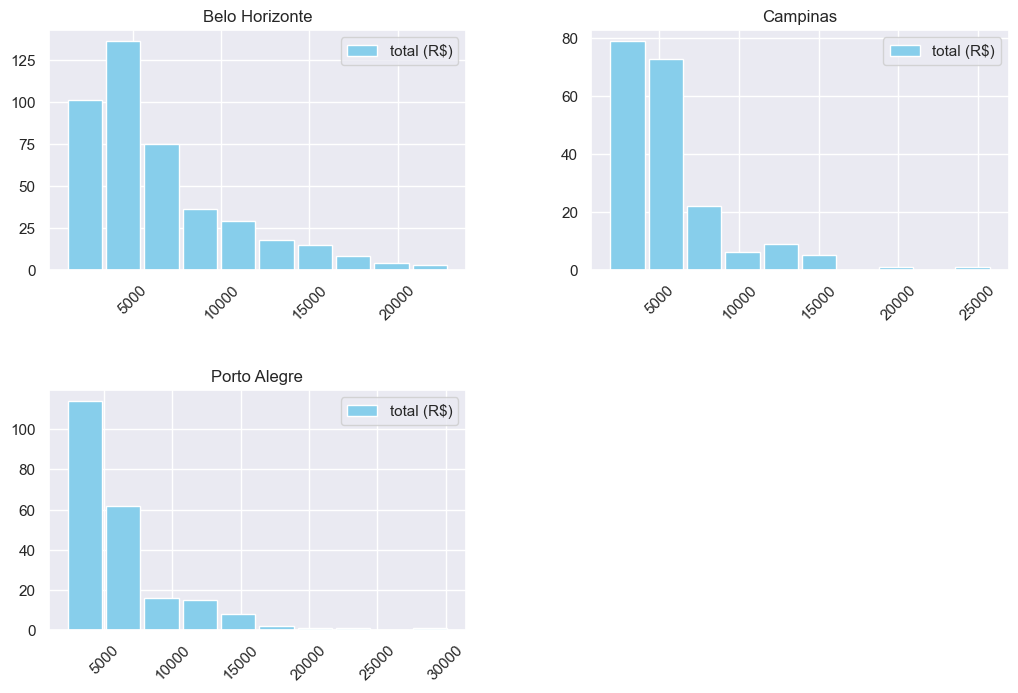

In [ ]:
# B2] Which city has most number of affordable houses i.e.< 3000$.

# Box plot
sb.set(font_scale=2)
plt.figure(figsize=(25,8))
plt.title('City-wise, Affordability of houses')
sb.boxplot(x=df_m['city'],y=df_m['total (R$)'],showmeans=True, meanprops={'marker':'o','markerfacecolor':'white',
                       'markeredgecolor':'black','markersize':'8'},order=['Porto Alegre','Campinas','Belo Horizonte'])

# Histogram
sb.set(font_scale=1)
df_m.hist(column='total (R$)', by='city',figsize=(12,8),rwidth=0.9,color='skyblue',legend=True,xrot=45)

'''
Interpretation:
'Porto Alegre' has max number of affordable houses i.e.< 3000$.
'''


In [ ]:
# LEVEL 2 (Bivariate Analysis)

"\nInterpretation:\n-> 'Belo Horizonte' - has most affordable low-rise (0-4 floors) houses.\n-> 'Campinas' - has most affordable high-rise (0-11 floors) houses.\n\n"

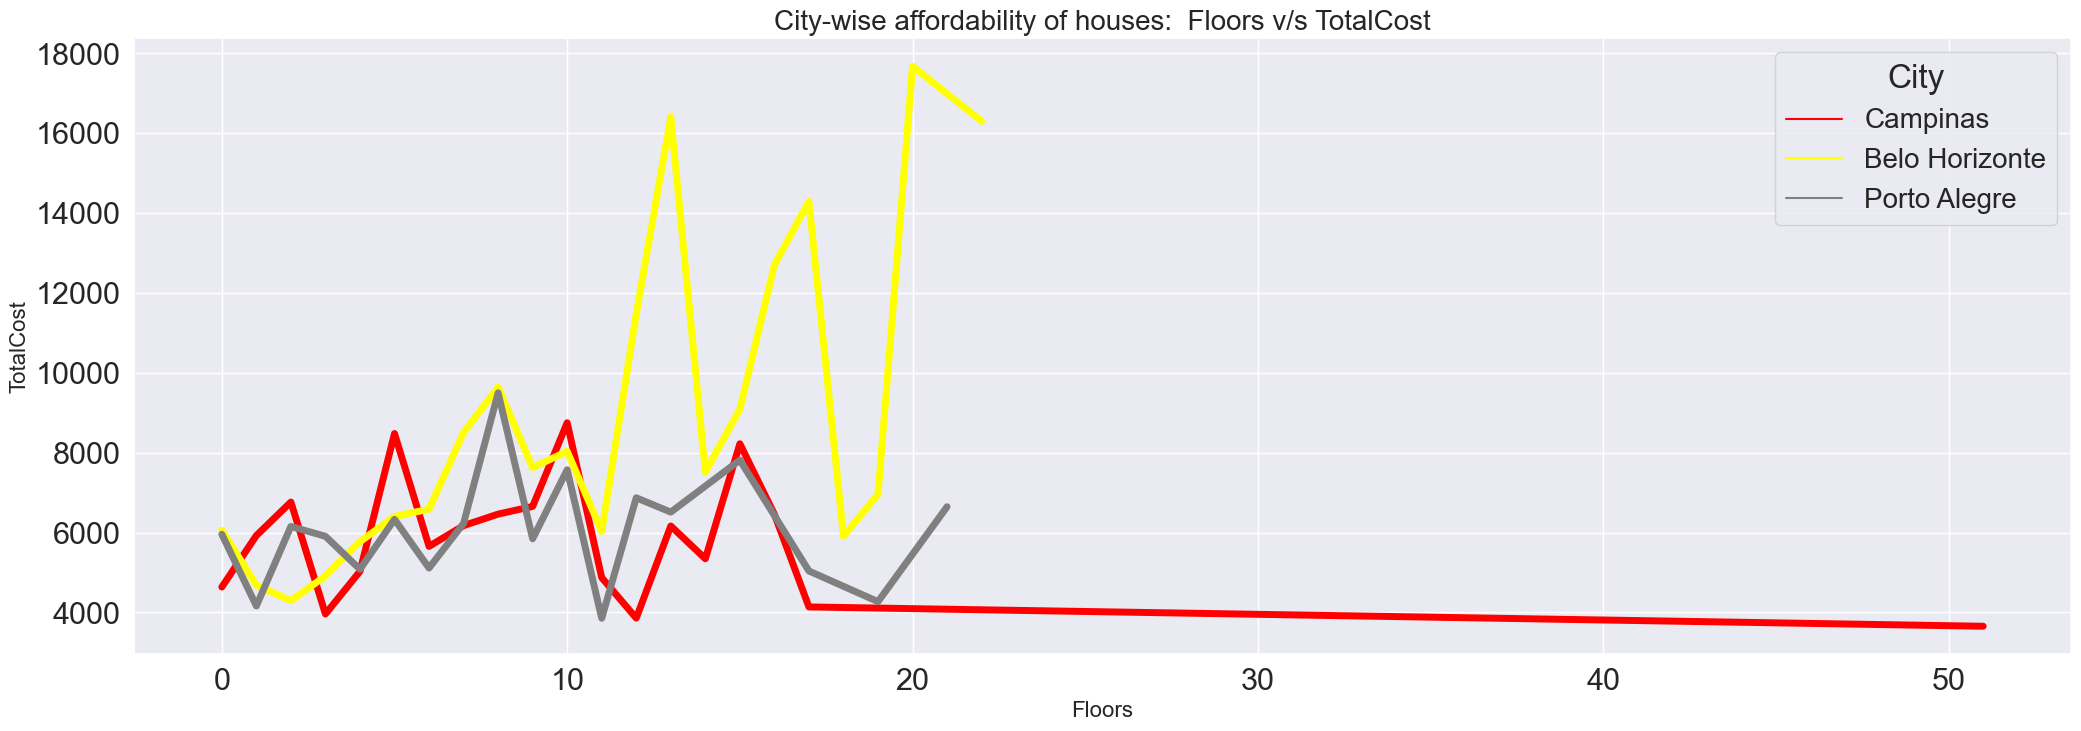

In [ ]:
# B3] With repect to Low-rise(0-5 floors)/High-rise buildings(5 floors & above),
#     which city has most affordable housing options?

df_b2= df_m[df_m['floor']<=100] # removing outlier for better calculation


plt.figure(figsize=(25,8))
sb.set(font_scale=2)
sb.lineplot(data=df_b2, x="floor", y="total (R$)",hue='city',palette=['red', 'yellow','grey'],ci=None,lw=5)
plt.legend(title='City', fontsize=20)
plt.title('City-wise affordability of houses:  Floors v/s TotalCost',fontsize=20)
plt.xlabel('Floors', fontsize=16);
plt.ylabel('TotalCost', fontsize=16);

'''
Interpretation:
-> 'Belo Horizonte' - has most affordable low-rise (0-4 floors) houses.
-> 'Campinas' - has most affordable high-rise (0-11 floors) houses.

'''

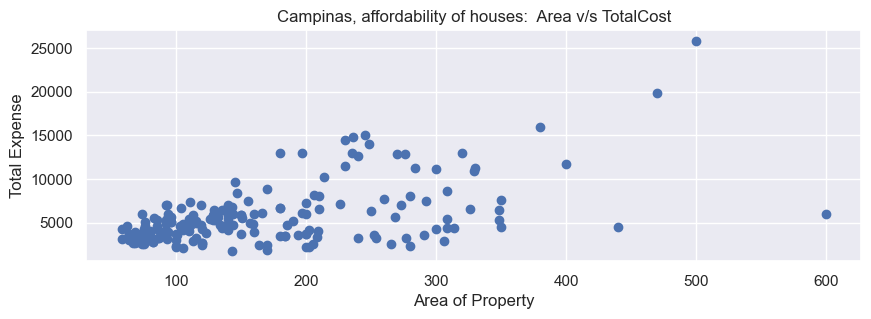

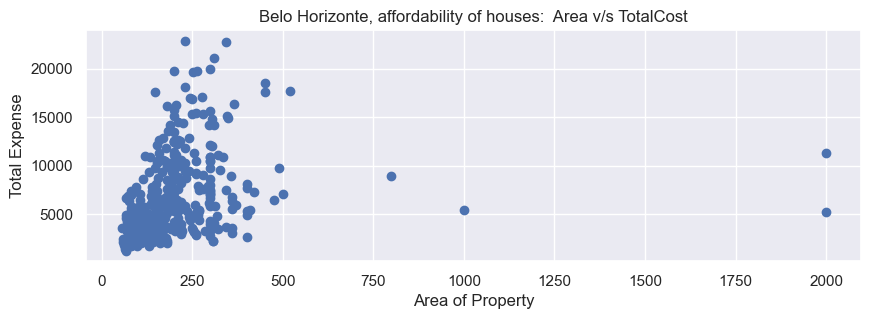

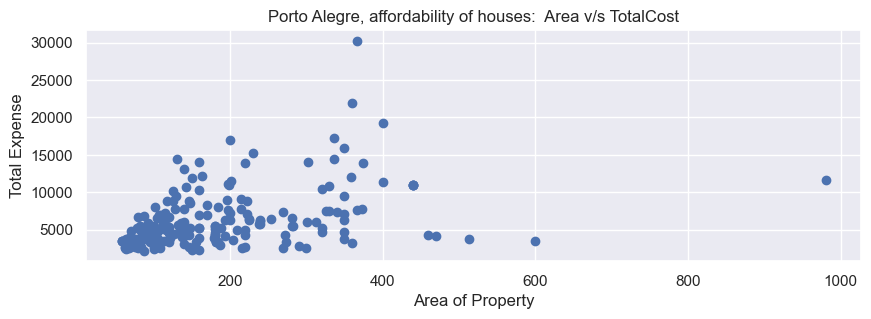

'\nInterpretation:\n-> \n-> \n\n\n'

In [ ]:
# B4] Which city has maximum affordable options for houses with repect to Area of property, available in < 3000 $

for city in df_m['city'].unique():
    sb.set(font_scale=1)
    df_m1 = df_m[df_m['city']==city] # filtering the rows

    fig, ax = plt.subplots(1, figsize=(10, 3))
    ax.scatter(df_m1['area'],df_m1['total (R$)'])
    ax.set_xlabel('Area of Property')
    ax.set_ylabel('Total Expense')
    ax.set_title(city+', affordability of houses:  Area v/s TotalCost')

plt.show()

'''
Interpretation:
->
->


'''

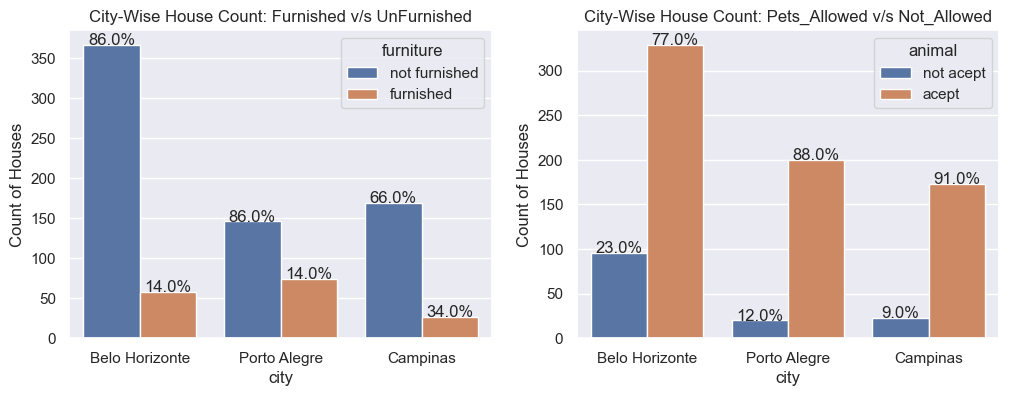

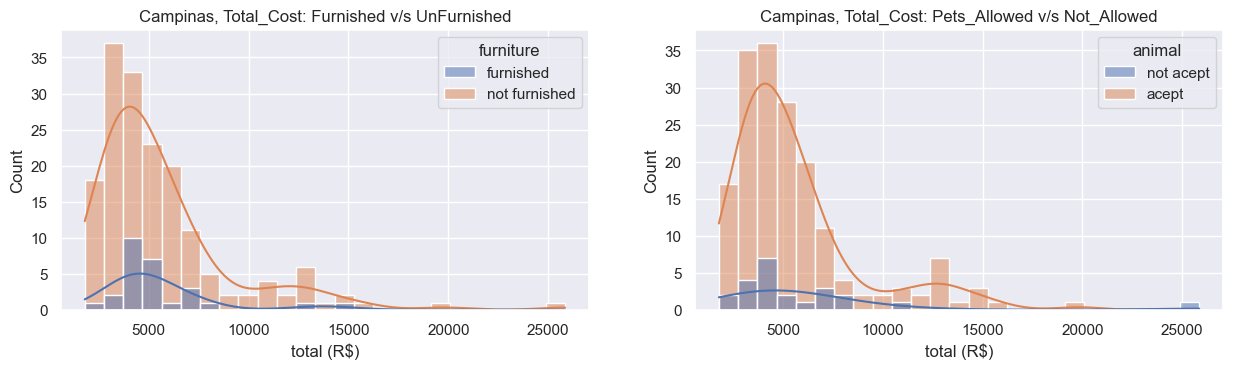

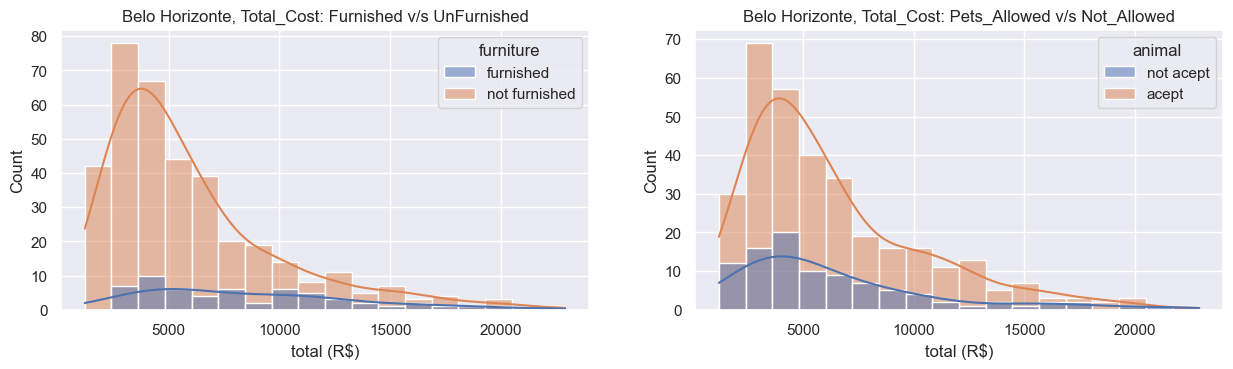

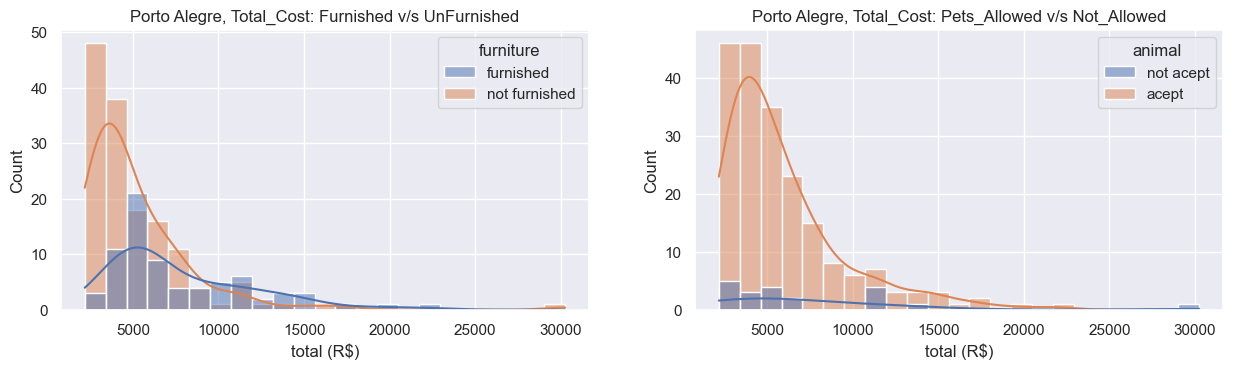

"\nInterpretation:\n-> 'Porto Alegre' has max Furnished houses, which are affordable. \n-> 'Belo Horizonte' has max UnFurnished houses, which are affordable. \n\n-> 'Belo Horizonte' has max houses with pets allowed, which are affordable.\n-> 'Belo Horizonte' has max houses with pets not allowed, which are affordable.\n"

In [ ]:
# B5] Which city has maximum number of affordable houses   (Based on Furnished/Non-Furnished)
#   & Which city has maximum number of affordable houses   (Based on Pets allowed/not allowed)

fig, axes = plt.subplots(1,2, figsize=(12, 4))
sb.set(font_scale=1)
col = pd.DataFrame(index=['Belo Horizonte', 'Campinas', 'Porto Alegre'])

# Countplot Based on Furnished/Non-Furnished
sb.countplot(x=df_m['city'],hue=df_m['furniture'],order = df_m['city'].value_counts().index, ax=axes[0])
axes[0].set(xlabel='city', ylabel='Count of Houses',title='City-Wise House Count: Furnished v/s UnFurnished')
per_abv_bar(df_m['city'],df_m['furniture'],col,axes[0])     # call generic fn to display % on bars

# Countplot Based on Pets allowed/not allowed
sb.countplot(x=df_m['city'],hue=df_m['animal'],order = df_m['city'].value_counts().index, ax=axes[1],hue_order=['not acept','acept'])
axes[1].set(xlabel='city', ylabel='Count of Houses',title='City-Wise House Count: Pets_Allowed v/s Not_Allowed')
per_abv_bar(df_m['city'],df_m['animal'],col,axes[1])     # call generic fn to display % on bars


for city in df_m['city'].unique():
    sb.set(font_scale=1)
    df_m1 = df_m[df_m['city']==city]
    fig = plt.figure(figsize=(15, 8))

    # histplot Based on Total_Cost-(Furnished/Non-Furnished)
    plt.subplot(2,2,1)
    plt.title(city+', Total_Cost: Furnished v/s UnFurnished')
    sb.histplot(x=df_m1['total (R$)'],hue=df_m1['furniture'],kde=True,hue_order=['furnished','not furnished'])

    # histplot Based on Total_Cost-(Pets allowed/not allowed)
    plt.subplot(2,2,2)
    plt.title(city+', Total_Cost: Pets_Allowed v/s Not_Allowed')
    sb.histplot(x=df_m1['total (R$)'],hue=df_m1['animal'],kde=True,hue_order=['not acept','acept'])

plt.show()

'''
Interpretation:
-> 'Porto Alegre' has max Furnished houses, which are affordable.
-> 'Belo Horizonte' has max UnFurnished houses, which are affordable.

-> 'Belo Horizonte' has max houses with pets allowed, which are affordable.
-> 'Belo Horizonte' has max houses with pets not allowed, which are affordable.
'''

In [ ]:
# LEVEL 3 (Multivariate Analysis)

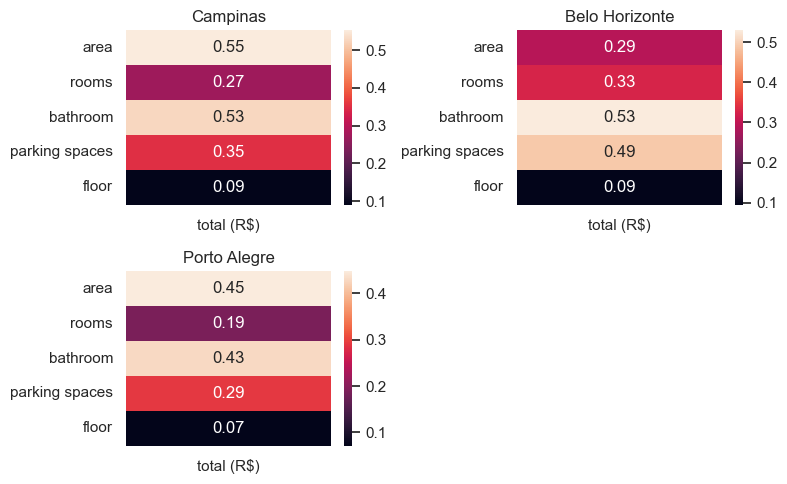

"\nInterpretation:\n-> 'Belo Horizonte' - show weak-moderate +ive correlation with Total Expense.\n-> 'Campinas' - show weak-moderate +ive correlation with Total Expense.\n-> 'Porto Alegre' - show weak-moderate +ive correlation with Total Expense.\n"

In [ ]:
# B6] Correlation b/w Total Expense and other columns

plt.figure(figsize=(8,5))
df_1 = df_m[df_m['city']=='Campinas']
city1=df_1.corr().iloc[0:5,-1:]
plt.subplot(2,2,1)
plt.title('Campinas')
sb.heatmap(city1,annot=True,fmt='0.2f')

df_2 = df_m[df_m['city']=='Belo Horizonte']
city2=df_2.corr().iloc[0:5,-1:]
plt.subplot(2,2,2)
plt.title('Belo Horizonte')
sb.heatmap(city2,annot=True,fmt='0.2f')

df_3 = df_m[df_m['city']=='Porto Alegre']
city3=df_3.corr().iloc[0:5,-1:]
plt.subplot(2,2,3)
plt.title('Porto Alegre')
sb.heatmap(city3,annot=True,fmt='0.2f')

plt.tight_layout()
plt.show()

'''
Interpretation:
-> 'Belo Horizonte' - show weak-moderate +ive correlation with Total Expense.
-> 'Campinas' - show weak-moderate +ive correlation with Total Expense.
-> 'Porto Alegre' - show weak-moderate +ive correlation with Total Expense.
'''

# C. Large sized families:

CRITERIA:
1. No. of rooms>=5
2. No. of bathrooms>=5
3. No. of parking spaces>=5

In [ ]:
df_l = df_filter[(df_filter['rooms']>=5) & (df_filter['bathroom']>=5) & (df_filter['parking spaces']>=5)]

In [ ]:
# LEVEL 1 (Univariate Analysis)

'\nInterpretation:\n86.5%: Belo Horizonte has max number of houses.\n'

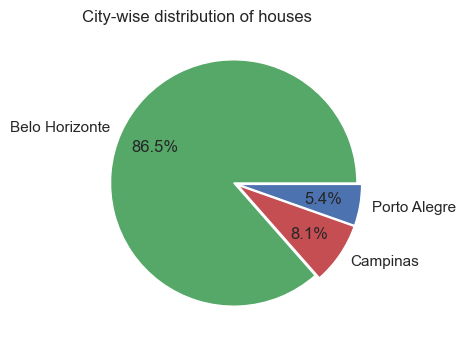

In [ ]:
# C0] Which city is the largest in terms of number of houses?

sb.set(font_scale=1)
data = df_l["city"].value_counts()                                   #value count is counting the number of values in the column
pie, ax = plt.subplots(1, figsize = [5,4])
labels =data.keys()                                                       # Keys returning you the index names in the data
plt.title('City-wise distribution of houses', loc='left')
ax.pie(x = data, explode = [0.02, 0.02, 0.02], labels = labels,autopct = "%.1f%%",pctdistance = 0.7,colors=['g','r','b'])  # pctdistance is the distance between the percentage on pie chart from center.


'''
Interpretation:
86.5%: Belo Horizonte has max number of houses.
'''

"\nInterpretation:\n-> 'Belo Horizonte' has max number of affordable houses i.e.< 3000$\n"

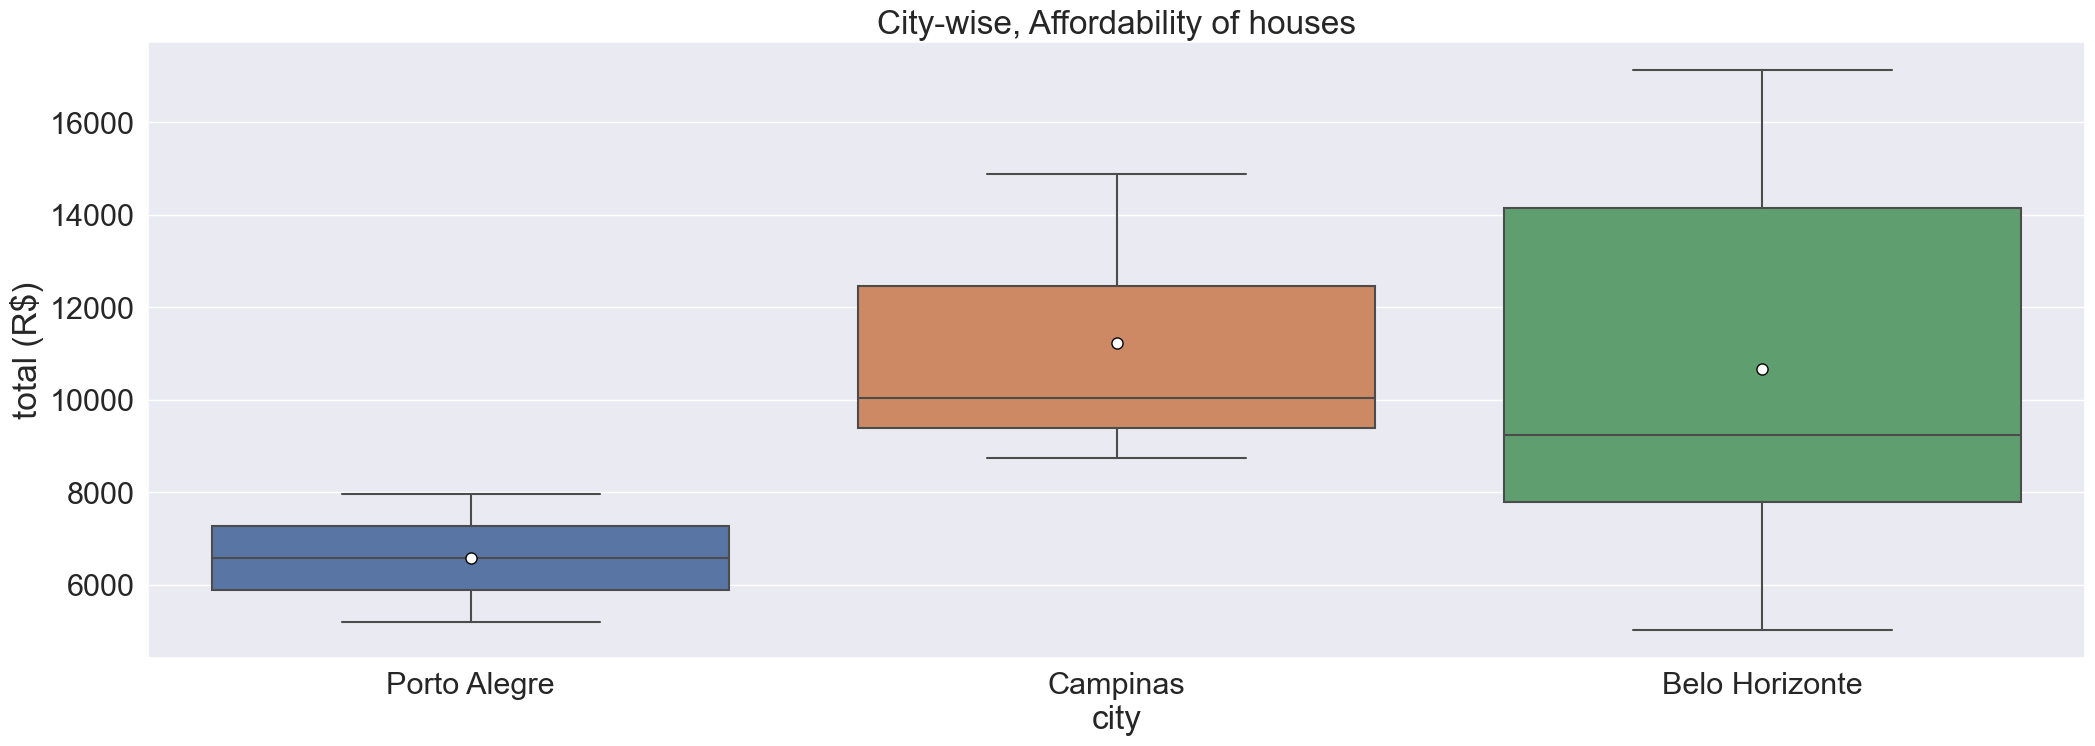

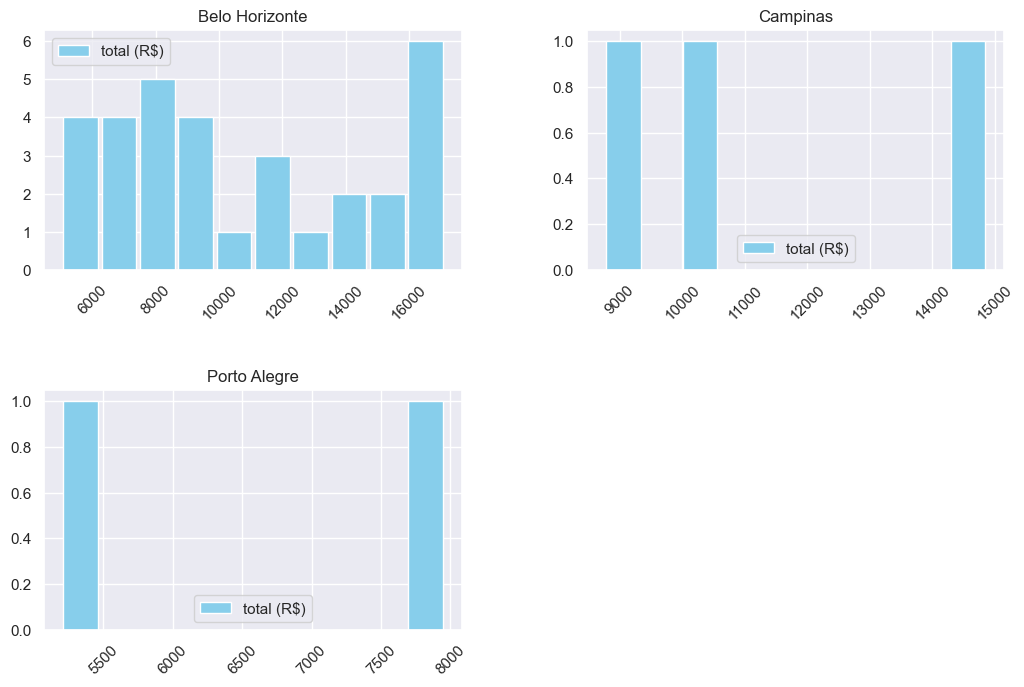

In [ ]:
# C2] Which city has most number of affordable houses i.e.< 3000$.

# Box plot
sb.set(font_scale=2)
plt.figure(figsize=(25,8))
plt.title('City-wise, Affordability of houses')
sb.boxplot(x=df_l['city'],y=df_l['total (R$)'],showmeans=True, meanprops={'marker':'o','markerfacecolor':'white',
                       'markeredgecolor':'black','markersize':'8'},order=['Porto Alegre','Campinas','Belo Horizonte'])

# Histogram
sb.set(font_scale=1)
df_l.hist(column='total (R$)', by='city',figsize=(12,8),rwidth=0.9,color='skyblue',legend=True,xrot=45)

'''
Interpretation:
-> 'Belo Horizonte' has max number of affordable houses i.e.< 3000$
'''

In [ ]:
# LEVEL 2 (Bivariate Analysis)

"\nInterpretation:\n-> 'Belo Horizonte' - has most affordable low-rise (0-4 floors) houses. & 'Porto Alegre' has only 1-story houses\n-> 'Belo Horizonte' - has most affordable high-rise (0-11 floors) houses.\n"

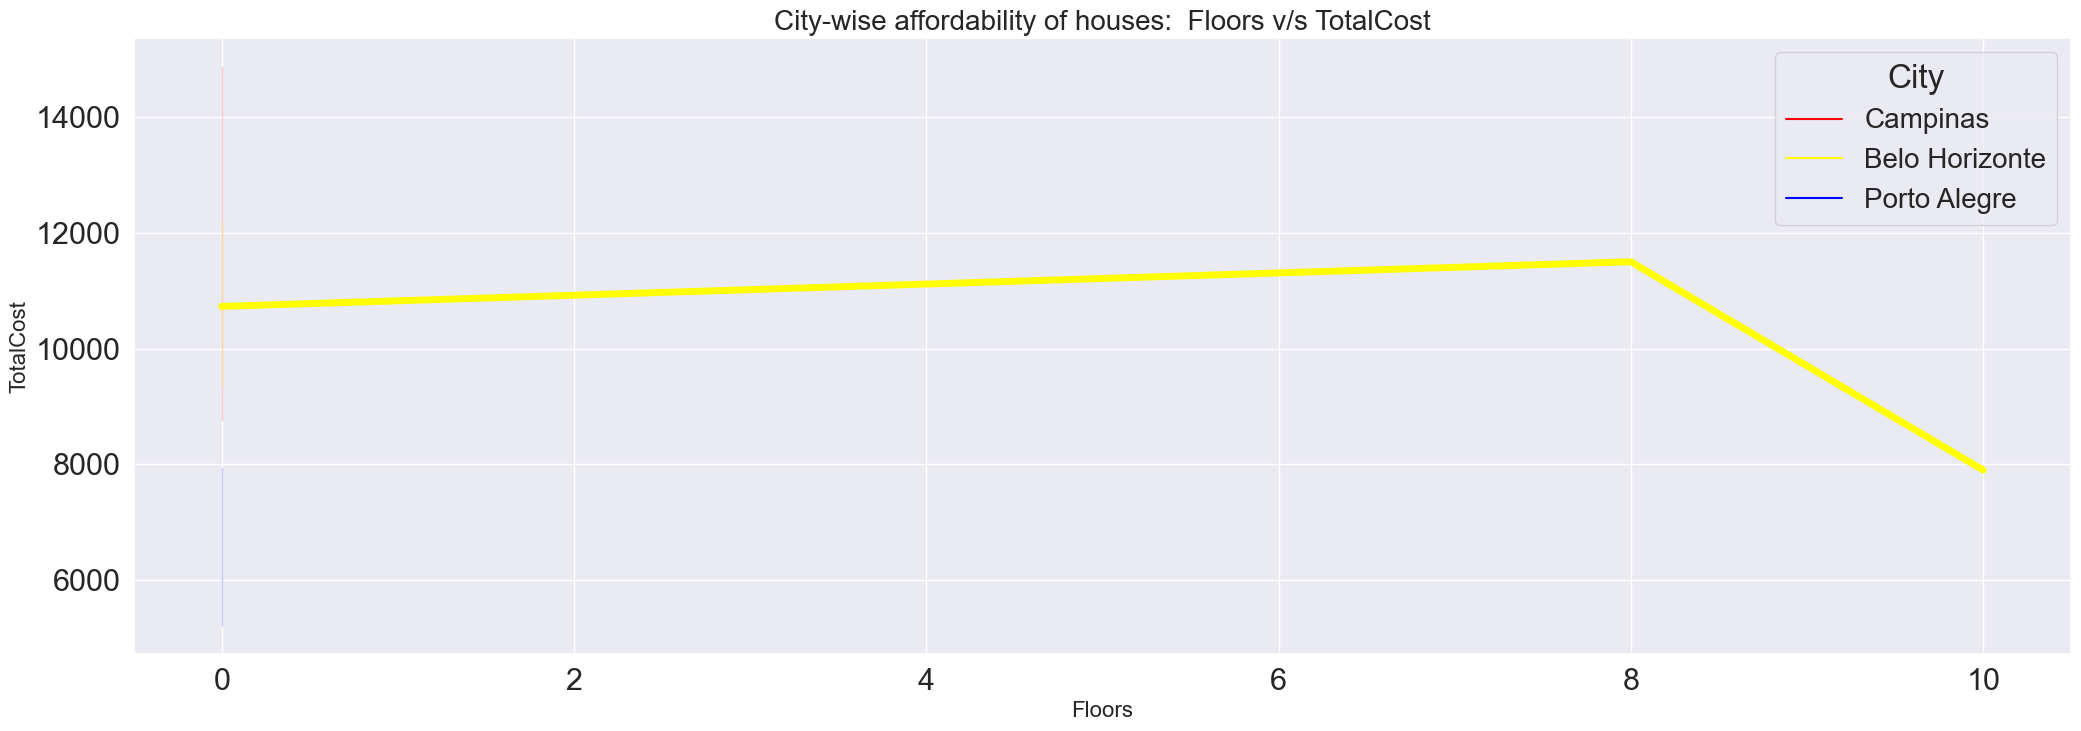

In [ ]:
# C3]  With repect to Low-rise(0-5 floors)/High-rise buildings(5 floors & above),
#      which city has most affordable housing options?

plt.figure(figsize=(25,8))
sb.set(font_scale=2)
sb.lineplot(data=df_l, x="floor", y="total (R$)",hue='city',palette=['red', 'yellow','blue'],lw=5)
plt.legend(title='City', fontsize=20)
plt.title('City-wise affordability of houses:  Floors v/s TotalCost',fontsize=20)
plt.xlabel('Floors', fontsize=16);
plt.ylabel('TotalCost', fontsize=16);

'''
Interpretation:
-> 'Belo Horizonte' - has most affordable low-rise (0-4 floors) houses. & 'Porto Alegre' has only 1-story houses
-> 'Belo Horizonte' - has most affordable high-rise (0-11 floors) houses.
'''

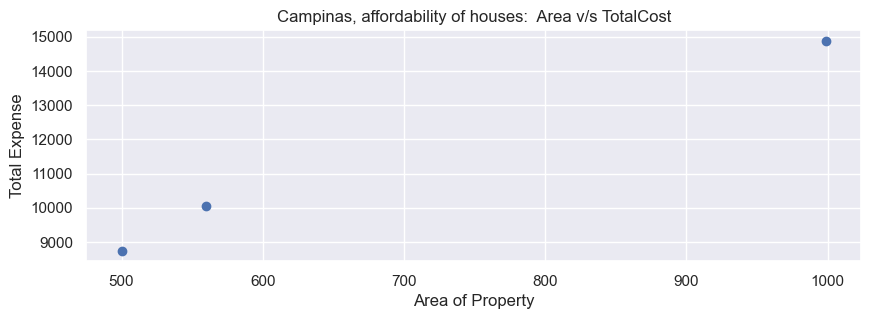

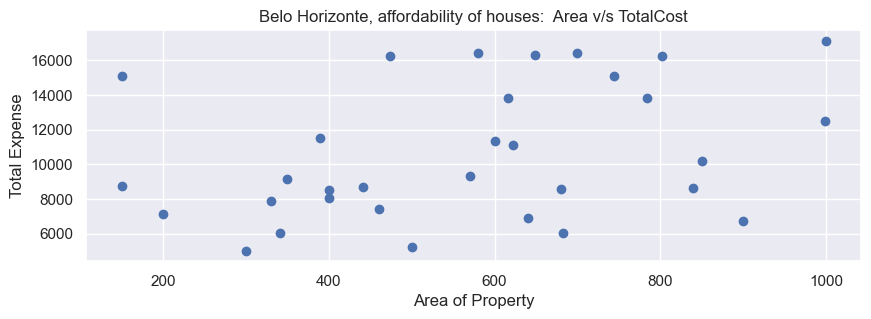

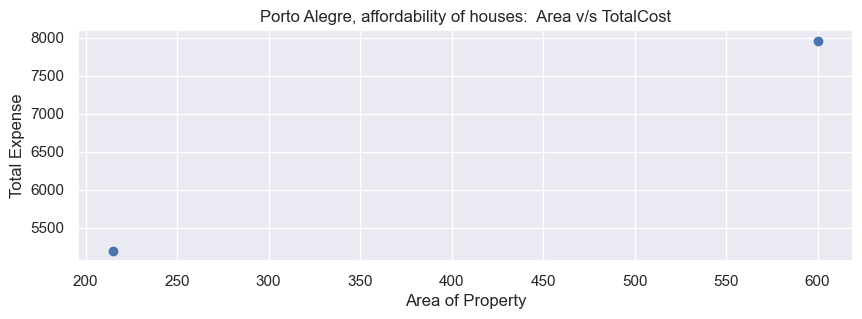

"\nInterpretation:\n-> 'Belo Horizonte' has max number of affordable houses area-wise\n"

In [ ]:
# C4]  Which city has maximum affordable options for houses with repect to Area of property, available in < 3000 $

for city in df_l['city'].unique():
    sb.set(font_scale=1)
    df_l1 = df_l[df_l['city']==city] # filtering the rows

    fig, ax = plt.subplots(1, figsize=(10, 3))
    ax.scatter(df_l1['area'],df_l1['total (R$)'])
    ax.set_xlabel('Area of Property')
    ax.set_ylabel('Total Expense')
    ax.set_title(city+', affordability of houses:  Area v/s TotalCost')

plt.show()

'''
Interpretation:
-> 'Belo Horizonte' has max number of affordable houses area-wise
'''

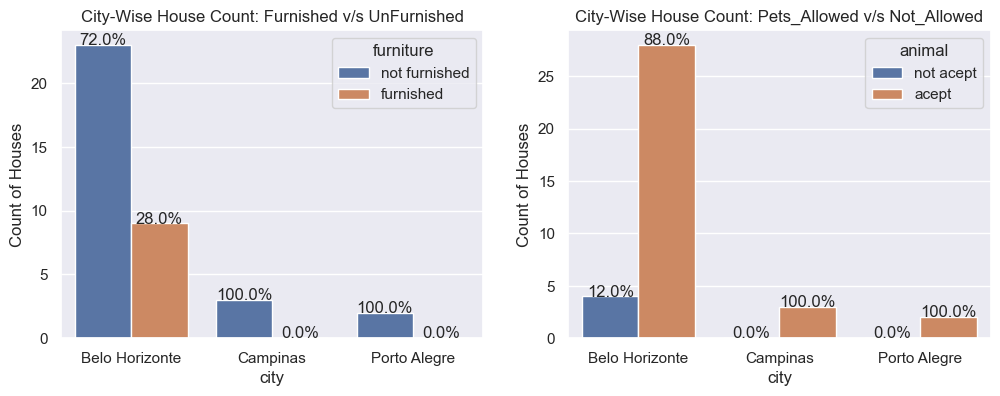

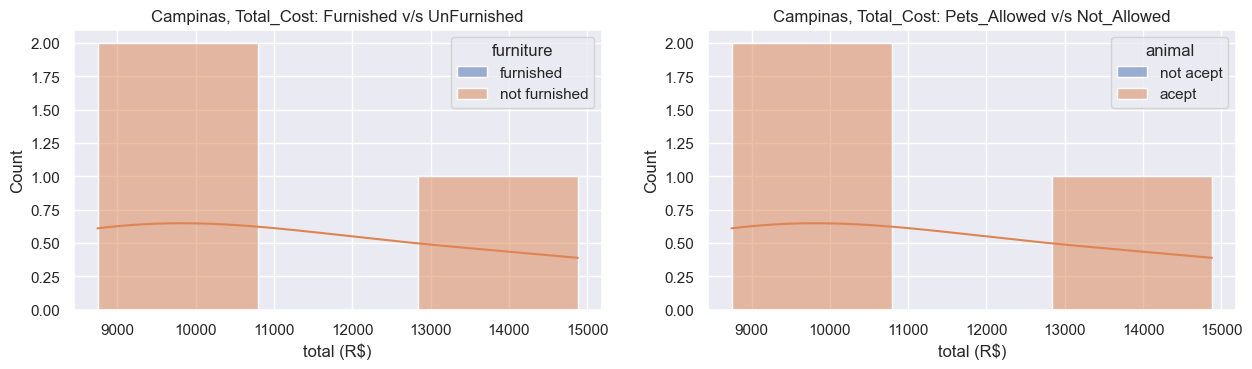

In [ ]:
# C5] Which city has maximum number of affordable houses   (Based on Furnished/Non-Furnished)
#   & Which city has maximum number of affordable houses   (Based on Pets allowed/not allowed)

fig, axes = plt.subplots(1,2, figsize=(12, 4))
col = pd.DataFrame(index=['Belo Horizonte', 'Campinas', 'Porto Alegre'])

# Countplot Based on Furnished/Non-Furnished
sb.set(font_scale=1)
sb.countplot(x=df_l['city'],hue=df_l['furniture'],order = df_l['city'].value_counts().index, ax=axes[0])
axes[0].set(xlabel='city', ylabel='Count of Houses',title='City-Wise House Count: Furnished v/s UnFurnished')
per_abv_bar(df_l['city'],df_l['furniture'],col,axes[0])     # call generic fn to display % on bars

# Countplot Based on Pets allowed/not allowed
sb.set(font_scale=1)
sb.countplot(x=df_l['city'],hue=df_l['animal'],order = df_l['city'].value_counts().index, ax=axes[1],hue_order=['not acept','acept'])
axes[1].set(xlabel='city', ylabel='Count of Houses',title='City-Wise House Count: Pets_Allowed v/s Not_Allowed')
per_abv_bar(df_l['city'],df_l['animal'],col,axes[1])     # call generic fn to display % on bars

for city in df_l['city'].unique():
    sb.set(font_scale=1)
    df_l1 = df_l[df_l['city']==city]
    fig = plt.figure(figsize=(15,8))

    # histplot Based on Total_Cost-(Furnished/Non-Furnished)
    plt.subplot(2,2,1)
    plt.title(city+', Total_Cost: Furnished v/s UnFurnished')
    sb.histplot(x=df_l1['total (R$)'],hue=df_l1['furniture'],kde=True,hue_order=['furnished','not furnished'])

    # histplot Based on Total_Cost-(Pets allowed/not allowed)
    plt.subplot(2,2,2)
    plt.title(city+', Total_Cost: Pets_Allowed v/s Not_Allowed')
    sb.histplot(x=df_l1['total (R$)'],hue=df_l1['animal'],kde=True,hue_order=['not acept','acept'])
plt.show()

'''
Interpretation:
-> 'Belo Horizonte' has max Furnished houses, which are affordable.
-> 'Belo Horizonte' has max UnFurnished houses, which are affordable.

-> 'Belo Horizonte' has max houses with pets allowed, which are affordable.
-> 'Belo Horizonte' has max houses with pets not allowed, which are affordable.
'''

In [ ]:
# LEVEL 3 (Multivariate Analysis)

In [ ]:
# C6] Correlation b/w Total Expense and other columns

plt.figure(figsize=(8,5))
df_1 = df_l[df_l['city']=='Campinas']
city1=df_1.corr().iloc[0:5,-1:]
plt.subplot(2,2,1)
plt.title('Campinas')
sb.heatmap(city1,annot=True,fmt='0.2f')

df_2 = df_l[df_l['city']=='Belo Horizonte']
city2=df_2.corr().iloc[0:5,-1:]
plt.subplot(2,2,2)
plt.title('Belo Horizonte')
sb.heatmap(city2,annot=True,fmt='0.2f')

df_3 = df_l[df_l['city']=='Porto Alegre']
city3=df_3.corr().iloc[0:5,-1:]
plt.subplot(2,2,3)
plt.title('Porto Alegre')
sb.heatmap(city3,annot=True,fmt='0.2f')

plt.tight_layout()
plt.show()


'''
Interpretation:
-> 'Belo Horizonte' - area shows weak +ive correlation with Total Expense.
-> 'Campinas' - show moderate-strong +ive correlation with Total Expense.
-> 'Porto Alegre' - area shows strong +ive correlation with Total Expense.
'''

# INTERPRETATION

In [ ]:
'''
# For relocation of Bachelors: (suitable cities)

Which city is the largest in terms of number of houses?
-> 51.3%: Porto Alegre has max number of houses.

Which city has most number of houses available in < 3000 $
-> 'Porto Alegre' has max number of affordable houses.

With repect to Low-rise(0-5 floors)/High-rise buildings(5 floors & above), which city has most affordable housing options?
-> 'Porto Alegre' - has most affordable low-rise (0-4 floors) houses.
-> 'Campinas' - has most affordable high-rise (0-11 floors) houses.

Which city has maximum affordable options for houses with repect to Area of property, available in < 3000 $?
-> 'Porto Alegre' has max number of affordable houses area-wise

Which city has maximum number of affordable houses   (Based on Furnished/Non-Furnished)
& Which city has maximum number of affordable houses   (Based on Pets allowed/not allowed)
-> 'Porto Alegre' has max Furnished houses, which are affordable.
   'Porto Alegre' has max UnFurnished houses, which are affordable.

-> 'Porto Alegre' has max houses with pets allowed, which are affordable.
   'Porto Alegre' has max houses with pets not allowed, which are affordable.

'''

In [ ]:
'''
# For relocation of Mid sized families (suitable cities)

Which city is the largest in terms of number of houses?
-> 50.5%: Belo Horizonte has max number of houses.

Which city has most number of houses available in < 3000 $
-> 'Belo Horizonte' has max number of affordable houses.

With repect to Low-rise(0-5 floors)/High-rise buildings(5 floors & above), which city has most affordable housing options?
-> 'Belo Horizonte' - has most affordable low-rise (0-4 floors) houses.
-> 'Campinas' - has most affordable high-rise (0-11 floors) houses.

Which city has maximum affordable options for houses with repect to Area of property, available in < 3000 $
-> 'Belo Horizonte' has max number of affordable houses area-wise

Which city has maximum number of affordable houses   (Based on Furnished/Non-Furnished)
& Which city has maximum number of affordable houses   (Based on Pets allowed/not allowed)
-> 'Porto Alegre' has max Furnished houses, which are affordable.
   'Belo Horizonte' has max UnFurnished houses, which are affordable.

-> 'Belo Horizonte' has max houses with pets allowed, which are affordable.
   'Belo Horizonte' has max houses with pets not allowed, which are affordable.

'''

In [ ]:
'''
# For relocation of Large Families (suitable cities)

Which city is the largest in terms of number of houses?
-> 86.5%: Belo Horizonte has max number of houses.

Which city has most number of houses available in < 3000 $
-> 'Belo Horizonte' has max number of affordable houses.

With repect to Low-rise(0-5 floors)/High-rise buildings(5 floors & above), which city has most affordable housing options?
-> 'Belo Horizonte' - has most affordable low-rise (0-4 floors) houses. & 'Porto Alegre' has only 1-story houses
-> 'Belo Horizonte' - has most affordable high-rise (0-11 floors) houses.

Which city has maximum affordable options for houses with repect to Area of property, available in < 3000 $
-> 'Belo Horizonte' has max number of affordable houses area-wise

Which city has maximum number of affordable houses   (Based on Furnished/Non-Furnished)
& Which city has maximum number of affordable houses   (Based on Pets allowed/not allowed)
-> 'Belo Horizonte' has max Furnished houses, which are affordable.
   'Belo Horizonte' has max UnFurnished houses, which are affordable.

-> 'Belo Horizonte' has max houses with pets allowed, which are affordable.
   'Belo Horizonte' has max houses with pets not allowed, which are affordable.


'''

# Conclusion:

# * Porto Alegre, can be considered most suitable city for relocation for        Bachelors.

# * Belo Horizonte, can be considered most suitable city for relocation for Mid-sized Families.

# * Belo Horizonte, can be considered most suitable city for relocation for Large Families.